# MetaTuner Testing on functions

In [1]:
import numpy as np
import random


# Define the functions

## f1 (1728), f2 (1369), f3 (1110), f4 (1262)

In [2]:
from scipy.stats import uniform

param_space1 = dict(x=uniform(-10, 22))

def objective_1(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*x*x
        results.append(x)
        
    return results


In [3]:
from scipy.stats import uniform

param_space2 = dict(x=uniform(-10, 47))

def objective_2(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*x
        results.append(x)
        
    return results

In [4]:
from scipy.stats import uniform

param_space3 = dict(x=uniform(-10, 47))


def objective_3(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = 30*abs(x)
        results.append(x)
        
    return results

In [5]:
from scipy.stats import uniform
import math

param_space4 = dict(x=uniform(-1500, 1500))


def objective_4(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*math.sin(x/1500.0)
        results.append(x)
        
    return results

In [6]:
param_space_list = [param_space1, param_space2, param_space3, param_space4]
objective_list = [objective_1, objective_2, objective_3, objective_4]

In [7]:
objective_values = []

from mango import MetaTuner


for seed in range(3):
    np.random.seed(seed)
    random.seed(seed)
    
    metatuner = MetaTuner(param_space_list, objective_list)
    metatuner.seed = seed
    
    metatuner.num_of_iterations = 100
    metatuner.initial_random = 2
    metatuner.run()
    
    objective_values.append(metatuner.objective_values_list)
       

# Save the Results

In [14]:
import pickle

with open('data/MetaTuner_functions_serial.pickle', 'wb') as f:
    pickle.dump(objective_values, f)

In [8]:
# Load the data

import pickle


with open('data/MetaTuner_functions_serial.pickle', 'rb') as f:
    objective_values = pickle.load(f)

# Plot the max function variations

In [9]:
objective_values = np.array(objective_values)

In [10]:
objective_values.shape

(3, 108)

In [11]:
results_variation = []

for j in range(objective_values.shape[0]):
    values = []
    for i in range(objective_values.shape[1]):
        val = np.max(objective_values[j,:(i+10)])
        #print(j,i,val)
        values.append(val)
    
    results_variation.append(values)
        

In [12]:
all_results_variation = np.array(results_variation)

print(all_results_variation.shape)

(3, 108)


In [13]:
avg_tuner = np.mean(all_results_variation,axis = 0)
min_tuner = np.min(all_results_variation,axis = 0)
max_tuner = np.max(all_results_variation,axis = 0)

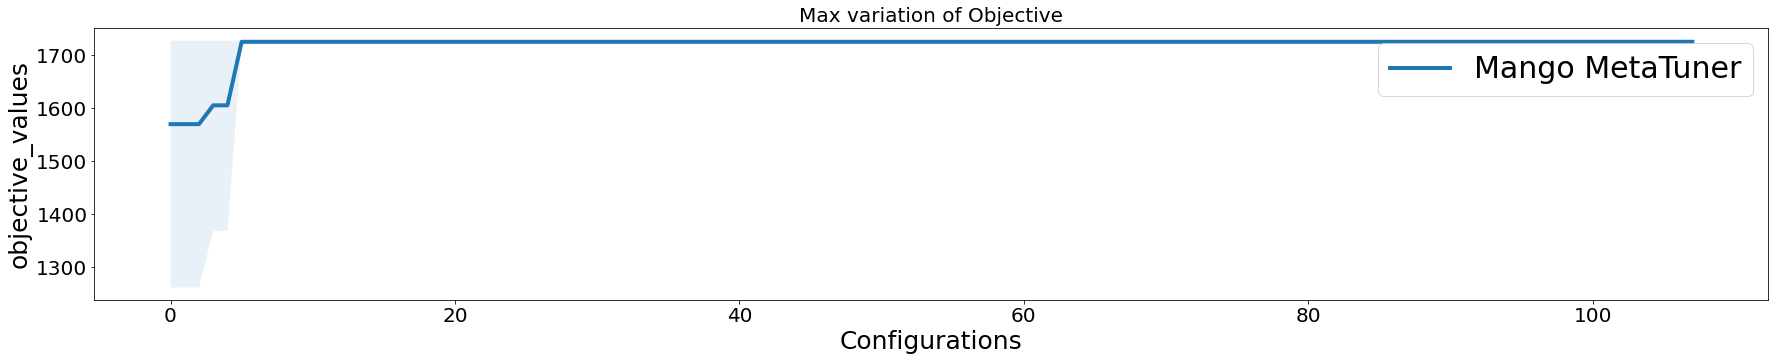

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)

configs = [i for i in range(all_results_variation.shape[1])]

plt.plot(configs, avg_tuner,lw=4,label='Mango MetaTuner')


plt.fill_between(configs, min_tuner, max_tuner, alpha=0.1)

plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()